# <p style="text-align: center;">DBMS Project: Airline Customer Satisfaction
## <p style="text-align: center;">by: Apoorva, Avani, Cherry, Abraham, Rachael
Understanding what resonates with travellers with data from different countries, airlines and classes. Tableau Dashboarding for data visualization and gaining business insights.

In [1]:
import time
start = time.time()

In [2]:
# Importing libraries for modelling & sentiment ananlysis tasks

from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
warnings.filterwarnings('ignore')

## Data Preprocessing

In [3]:
data_airline=pd.read_csv('Airline-Dataset.csv') # loading data

In [4]:
data_airline.columns

Index([u'Unnamed: 0', u'airline_name', u'author', u'author_country',
       u'content', u'cabin_flown', u'overall_rating', u'seat_comfort_rating',
       u'cabin_staff_rating', u'food_beverages_rating',
       u'inflight_entertainment_rating', u'value_money_rating', u'Month',
       u'Year', u'recommended'],
      dtype='object')

In [5]:
data_airline.head()

,Unnamed: 0,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,1,adria-airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,2,adria-airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,3,adria-airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,4,adria-airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


In [6]:
#Separating the dataset into categorical and numerical variables
# Filter only the top 6 US airlines 

US_airlines_top_6 = ['allegiant-air','american-airlines','delta-air-lines','frontier-airlines','united-airlines','us-airways']
data_airline1 = data_airline[data_airline['airline_name'].isin(US_airlines_top_6)]

In [7]:
data_airline1.shape

(2439, 15)

In [8]:
#dummy coding the cabin type variable
dummy = pd.get_dummies(data_airline1[['cabin_flown']])

In [9]:
# taking the variable of interest in the new dataset
data_airline2=data_airline1[['seat_comfort_rating',
       'cabin_staff_rating', 'food_beverages_rating',
       'inflight_entertainment_rating', 'value_money_rating', 'Month', 'Year',
       'recommended']]

In [10]:
for item in dummy.columns:
    data_airline2[item]=dummy[item]

In [11]:
data_airline2.shape

(2439, 12)

In [12]:
data_airline2.head()

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended,cabin_flown_Business Class,cabin_flown_Economy,cabin_flown_First Class,cabin_flown_Premium Economy
4825,1.0,1.0,1.0,1.0,1.0,7,2015,0,0,1,0,0
4840,3.0,2.0,1.0,1.0,3.0,7,2015,1,0,1,0,0
4848,5.0,5.0,5.0,3.0,5.0,7,2015,1,0,1,0,0
4855,1.0,1.0,1.0,1.0,1.0,7,2015,0,0,1,0,0
4874,2.0,2.0,2.0,1.0,2.0,7,2015,0,0,1,0,0


## Data Visualization

Data Visualization and dashboarding has been done on tableau, follow link:

https://public.tableau.com/profile/cherry.agarwal7897#!/vizhome/DBMSProject/Ratingsdata?publish=yes

## Sentiment Analysis

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
#gives the sentiment for each review using nltk vader (positive, negative and compound score)
def Sentiment_Polarity(dataframe):
    compound=[]
    pos=[]
    neg = []
    neu = []
    for sentence in dataframe['content']: #reading each review one by one
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(sentence)
        compound.append(ss['compound']) # getting the compound score
        pos.append(ss['pos']) # getting the positive score 
        neg.append(ss['neg']) # getting the negative score
        neu.append(ss['neu']) # getting the neutral score
    compound_series = pd.Series(compound)
    pos_series = pd.Series(pos)
    neg_series = pd.Series(neg)
    neu_series = pd.Series(neu)
    dataframe['Compound'] = compound_series.values
    dataframe['Positive'] = pos_series.values
    dataframe['Negative'] = neg_series.values
    dataframe['Neutral'] = neu_series.values
    #return dataframe['Polarity']

In [15]:
Sentiment_Polarity(data_airline) # calling the function for our data

## Word Cloud

In [16]:
# Wordcloud for most common words occuring for best rated airline in US and least rated airline in US

#!pip install WordCloud install if required
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
mask = np.array(Image.open(requests.get('http://clipart-library.com/images/8cznoea9i.jpg', stream=True).raw))
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [17]:
# filtering important words

nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def cleaning(s):
    from string import punctuation
    for p in punctuation:
        s =s.replace(p,'')
    s=s.lower()
    s =re.sub('[0-9]+','',s)
    words =re.findall('\w+',s)
    words =re.findall('\w+',s)
    wnl = nltk.WordNetLemmatizer()
    filtered_words = [w for w in words if not w in stop_words]
    filtered_words=[wnl.lemmatize(t) for t in filtered_words]
    new=""
    for x in filtered_words: 
            new += x + ' ' 
    for i in ['ed','flight', 'airline', 'plane', 'us', 'united', 'delta', 'hour', 'time', 'airport','told','flying','luggage','tomer','seat','another','ua','chicago','two','got','back','find','later','service']:
        new=new.replace(i," ")
        
    return new

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


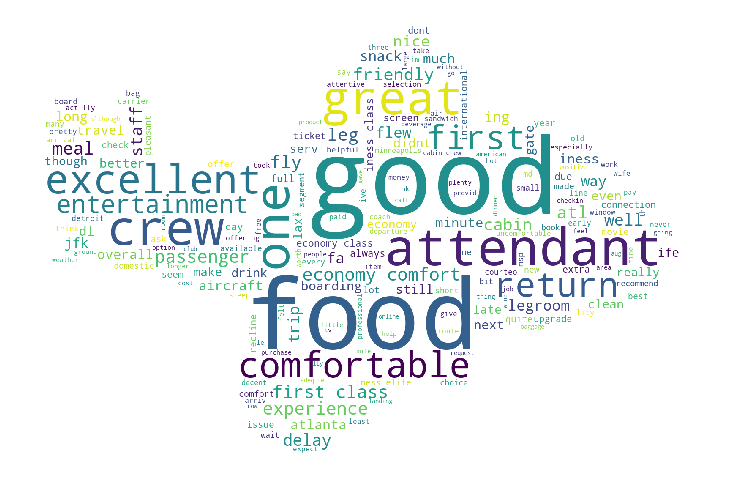

In [18]:
#Positive Sentiment of travellers for Delta (we can see words like excellent, comfortable, good entertainment, nice)

mask_1= (data_airline['airline_name']=="delta-air-lines") & (data_airline['author_country']=="United States") & (data_airline['Compound']>0.5)
Positive_Sentiment=data_airline[mask_1]['content']
Positive_Comments=Positive_Sentiment.str.cat(sep='').replace("'","")
word_cloud_positive=cleaning(Positive_Comments)
generate_wordcloud(word_cloud_positive, mask)

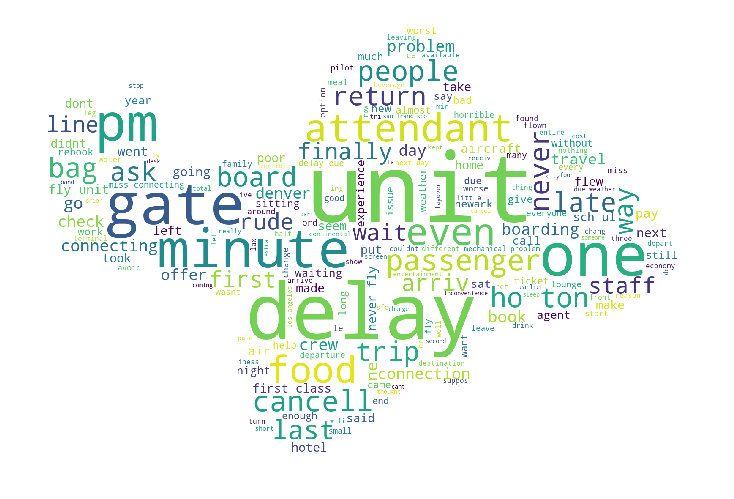

In [19]:
#Negative Sentiment of travellers for united-airlines (we can see words like delay, never, rude, etc)

mask_2= (data_airline['airline_name']=="united-airlines") & (data_airline['author_country']=="United States") & (data_airline['Compound']<-0.5)
Negative_Sentiment=data_airline[mask_2]['content']
Negative_Comments=Negative_Sentiment.str.cat(sep='').replace("'","")
word_cloud_negative=cleaning(Negative_Comments)
generate_wordcloud(word_cloud_negative, mask)

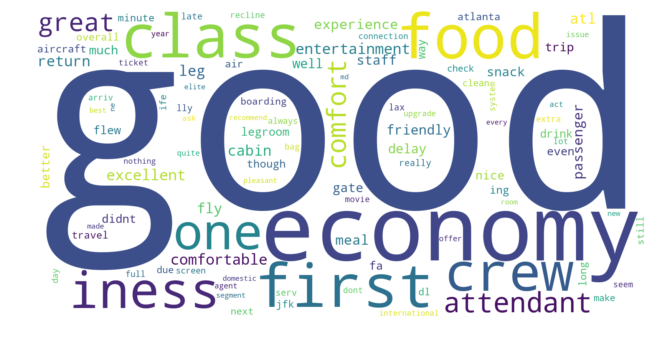

In [20]:
#Positive Sentiment for Delta Airlines (visualized again for better resolution)

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white",collocations=False).generate(word_cloud_positive)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

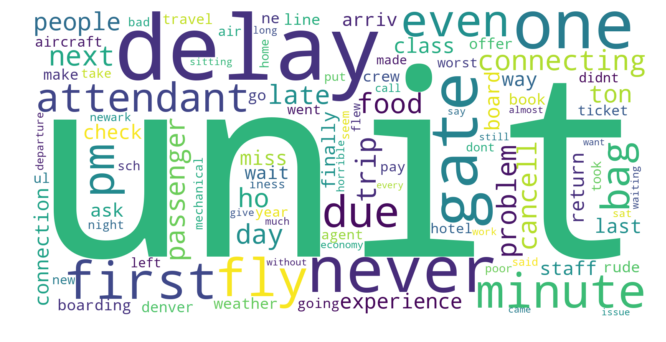

In [21]:
#Negative Sentiment for Delta Airlines (visualized again for better resolution)

wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white",collocations=False).generate(word_cloud_negative)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Split Train and Test

In [22]:
#Modelling tasks
#Splitting of train & test data

train_num=int(data_airline2.shape[0]*0.8)
columns=[]
for x in data_airline2.columns:
    if x !='recommended':
        columns.append(x)

X_train=data_airline2[columns][:train_num] # creating train data x variables
y_train=data_airline2['recommended'][:train_num] # creating train data y variable
X_test=data_airline2[columns][train_num:] # doing the same for test data
y_test=data_airline2['recommended'][train_num:]

## Logistic Regression

In [23]:
#Fitting of logistic regression on Recommended using cross validation method

lr=LogisticRegression() # fitting logistic regression
lrcv = GridSearchCV(lr,param_grid = { 
    'C':[0.1,1,10,100] # defining the parameter grid
}, cv=5)

In [24]:
pred=lrcv.fit(X_train,y_train).predict(X_test) #predicting the result on test data

In [25]:
pred_proba=lrcv.predict_proba(X_test) #getting predicted probabilities

In [26]:
lrcv.best_params_ #checking the best parameter for the model

{'C': 100}

In [27]:
confusion_matrix(y_test, pred) #evaluating the model with confusion matrix

array([[314,  21],
       [ 15, 138]], dtype=int64)

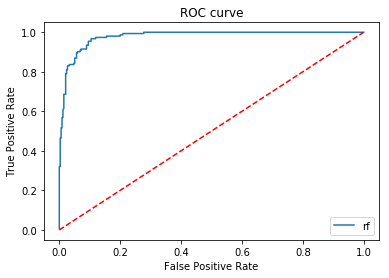

In [28]:
#ploting the ROC curve(Region under the curve)
roc_auc = roc_auc_score(y_test, pred) #calculate ROC score
fpr, tpr,threshold = roc_curve(y_test, pred_proba[:,1]) #get the false positive and true positive rate along with the threshold

plt.figure()
plt.plot(fpr, tpr,label='rf' % roc_auc) #plot the curve
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [29]:
lr_importance=LogisticRegression(C= 100) #refitting the model with the best parameter

In [30]:
lr_importance.fit(X_train,y_train) # getting important variables identiifed by the model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
#Key variables that are important

feature_importance = abs(lr_importance.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importances = pd.DataFrame(feature_importance,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

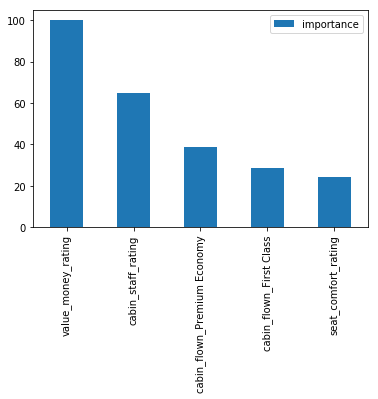

In [32]:
feature_importances[:5].plot(kind='bar')
plt.xticks(rotation=90) # ploting the top 5 important features

In [33]:
pred_lr=lr_importance.predict(X_test)
confusion_matrix(y_test, pred_lr)

array([[314,  21],
       [ 15, 138]], dtype=int64)

In [34]:
accuracy_score(y_test, pred_lr) #checking the accuracy with the best parameter obtained above

0.92622950819672134

## Random Forest

In [35]:
# Random forest
rf = RandomForestClassifier() #Create parameter grid for the model to select the best ones
rfcv = GridSearchCV(rf,param_grid = { 
    
    'n_estimators': [200,300,400, 500],
    'criterion' :['gini', 'entropy']
}, cv=5)

## Extra parameters tested for Random Forest

# {
#     'bootstrap': [True],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth' : [6,7,8],
#     'criterion' :['gini', 'entropy'],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

In [36]:
fit=rfcv.fit(X_train,y_train) # Fitting the model on the train data
pred=fit.predict(X_test) #test the model on testing data

In [37]:
pred_proba=rfcv.predict_proba(X_test) # Get the predicted probabilities

In [38]:
rfcv.best_params_ # check for the best parameters

{'criterion': 'gini', 'n_estimators': 300}

In [39]:
confusion_matrix(y_test, pred) # Confusion matrix

array([[313,  22],
       [ 24, 129]], dtype=int64)

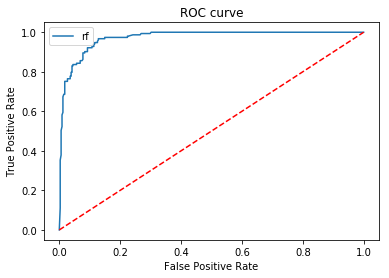

In [40]:
## Plotting the ROC curve for random forest
roc_auc = roc_auc_score(y_test, pred)
fpr, tpr,threshold = roc_curve(y_test, pred_proba[:,1])

plt.figure()
plt.plot(fpr, tpr,label='rf' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [41]:
rf_importance=RandomForestClassifier(n_estimators= 400,criterion='gini') #Fitting model again with the best parameters

In [42]:
rf_importance.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

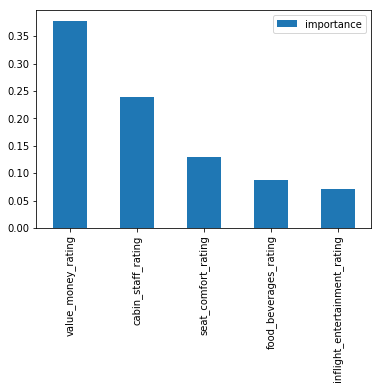

In [43]:
#Key Variables that are important

feature_importances = pd.DataFrame(rf_importance.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_importances[:5].plot(kind='bar')
plt.xticks(rotation=90)

In [44]:
## Time taken to run the entire code on local
end = time.time()
print(end - start)

#6.7 minutes

405.866999865
